# UTS Analisis data

## pengambilan data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# Load dataset dari UCI repository
url = "https://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip"
data = pd.read_csv(url)
data.head()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(data.head())

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2  

## Pemahaman Data ( data understanding)

Shape: (418, 20)

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 n

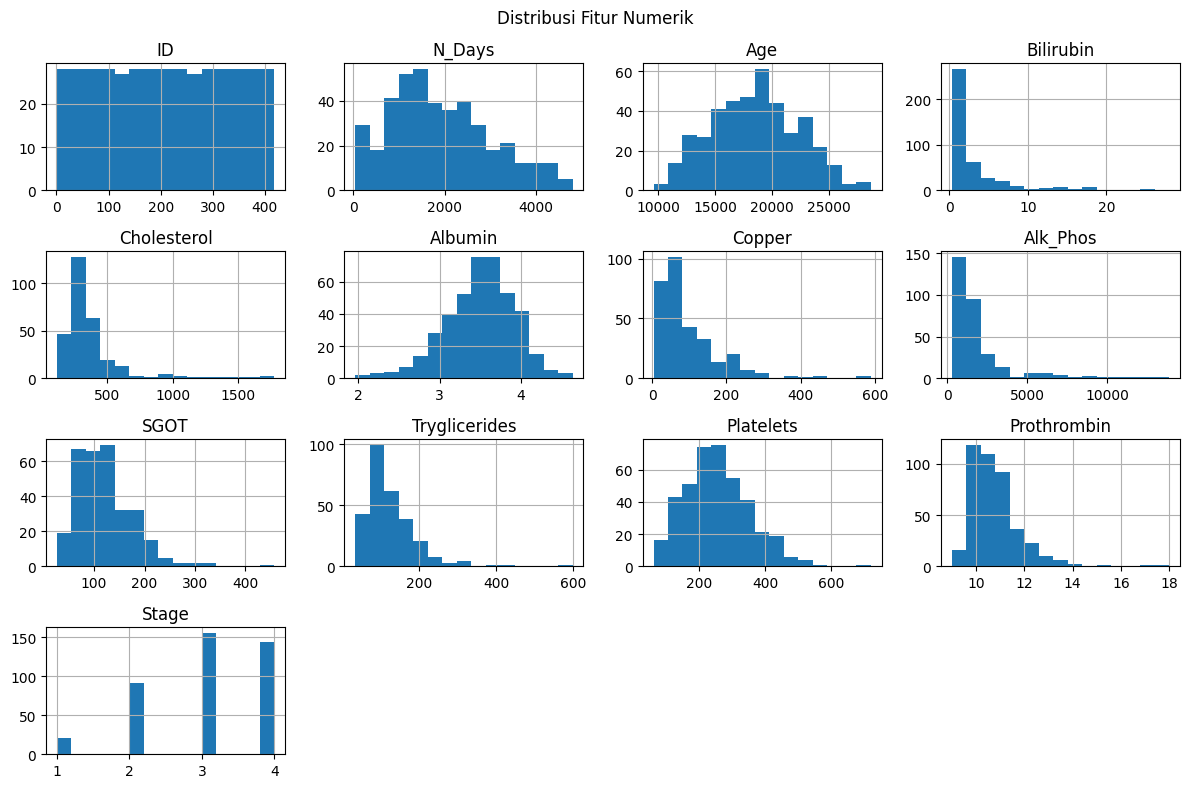

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

print("Shape:", data.shape)
print("\nInfo DataFrame:")
data.info()
print("\nStatistik deskriptif (numerik):")
print(data.describe().T)

missing_pct = data.isna().mean().sort_values(ascending=False) * 100
print("\nPersentase missing value per kolom:")
print(missing_pct)

categorical = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
for col in categorical:
    print(f"\nValue counts '{col}':")
    print(data[col].value_counts(dropna=False))

numeric_cols = data.select_dtypes(include=['float64','int64']).columns
data[numeric_cols].hist(bins=15, figsize=(12,8))
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()


## Pemrosesan awal data (Preprocessing )

In [3]:
import pandas as pd
import numpy as np
# Load dataset dari UCI repository
url = "https://archive.ics.uci.edu/static/public/878/cirrhosis+patient+survival+prediction+dataset-1.zip"
data = pd.read_csv(url)
data.head()
data = data.dropna(subset=['Status']).copy()


data['Status'] = data['Status'].map({'C': 0, 'D': 1})
num_cols = data.select_dtypes(include=np.number).columns.drop('Status', errors='ignore')
medians = data[num_cols].median()

data[num_cols] = data[num_cols].fillna(medians)
cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for col in cat_cols:
    if col in data.columns:
        modes = data[col].mode()
        if not modes.empty:
            data[col] = data[col].fillna(modes[0])
        else:
            print(f"WARNING: no mode found for '{col}', dropping this column.")
            data.drop(columns=[col], inplace=True)
for col in cat_cols:
    if col in data.columns:
        data[col] = pd.Categorical(data[col]).codes
print("Sisa missing per kolom:\n", data.isna().sum())
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
X = data.drop('Status', axis=1).values
y = data['Status'].values
nan_mask = np.isnan(data['Status'])
y = data['Status'][~nan_mask].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Preprocessing selesai. Ukuran dataset:", data.shape)

Sisa missing per kolom:
 ID                0
N_Days            0
Status           25
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol       0
Albumin           0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
Stage             0
dtype: int64
Preprocessing selesai. Ukuran dataset: (418, 20)


## Pemodelan (model klasifikasi)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)




Akurasi       : 0.76
Precision     : 0.78
Recall        : 0.56
F1-score      : 0.65

Confusion Matrix:
[[42  5]
 [14 18]]

Classification Report:
              precision    recall  f1-score   support

     Survive       0.75      0.89      0.82        47
       Death       0.78      0.56      0.65        32

    accuracy                           0.76        79
   macro avg       0.77      0.73      0.74        79
weighted avg       0.76      0.76      0.75        79



## evaluasi



In [ ]:

acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred)
rec   = recall_score(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

print(f"Akurasi       : {acc:.2f}")
print(f"Precision     : {prec:.2f}")
print(f"Recall        : {rec:.2f}")
print(f"F1-score      : {f1:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Survive','Death']))

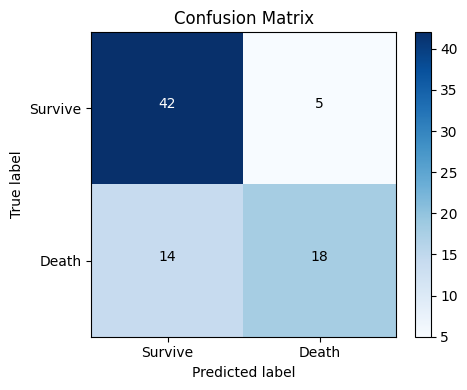

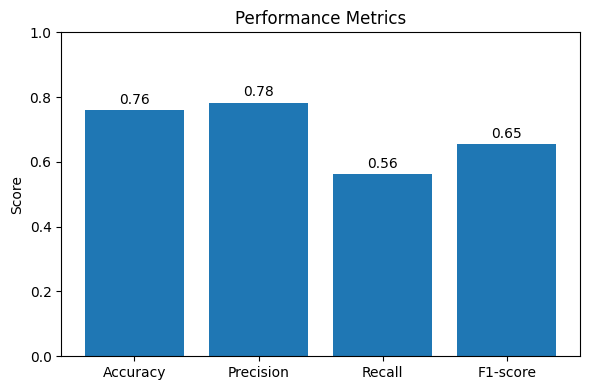

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Survive','Death']

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()
metrics = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-score': f1
}

plt.figure(figsize=(6,4))
bars = list(metrics.keys())
values = list(metrics.values())
plt.bar(bars, values)
plt.ylim(0,1)
for idx, v in enumerate(values):
    plt.text(idx, v + 0.02, f"{v:.2f}", ha='center')

plt.title('Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
